<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/LMMSE_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LMMSE Estimation

LMMSE Estimation is similar to Bayesian Estimation. However, instead of minimizing $\mathbb{E}[|\hat{x}-X|^2 | Y=y]$ we minimize $\mathbb{E}[|\hat{x}-X|^2]$. Also, while in Bayesian estimation $\hat{x} = \mathbb{E} [X | Y = y]$ may depend arbitrarily on $y$ in LMMSE estimation $\hat{x}$ is of the linear form $\hat{x} = h_1 Y_1 + \ldots + h_n Y_n$.

## Example 5.2 (page 135 in lecture notes as of 2020)

Let $X$ have mean $m_X = 0$ and variance $\sigma_X^2$. We want to estimate $X$ based on the observed vector $Y = aX + W$ with known $a\in \mathbb{R}^n$ and noise $W$, which has zero mean, variance $\sigma_W^2 I$ and is independent of $X$. To make the example more tangible let us fix $n=2$ observations.

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#Important Stuff
################################################################################
def calculate_h(a, m_X, sigma_X, sigma_W):
  return np.conj(a)/(np.linalg.norm(a)**2 + sigma_W**2/(sigma_X**2+m_X**2))
################################################################################

#read in parameters
m_XG = 0
sigma_XG = 1
sigma_WG = 1
a_1G = 1
a_2G = 1
y_1G = 0
y_2G = 0
h_1G = 0
h_2G = 0
def update_parameters2(m_X, sigma_X, sigma_W, a_1, a_2):
  global a_1G, a_2G, m_XG, sigma_XG, sigma_WG, h_1G, h_2G
  a_1G, a_2G, m_XG, sigma_XG, sigma_WG = a_1, a_2, m_X, sigma_X, sigma_W,

  h_1G, h_2G = calculate_h([a_1G, a_2G], m_XG, sigma_XG, sigma_WG)
  print("h_opt = ", h_1G, ",", h_2G)
widgets.interact(update_parameters2, m_X = widgets.FloatSlider(min=-10, max=10, value=0), sigma_X = widgets.FloatSlider(min=0, max=2, value=1), sigma_W = widgets.FloatSlider(min=0, max=2, value=1), a_1 = widgets.FloatSlider(min=-3, max=3, value=1), a_2 = widgets.FloatSlider(min=-3, max=3, value=1));

interactive(children=(FloatSlider(value=0.0, description='m_X', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

You may set the conditions for the problem. The ideal coefficients for LMMSE are found by the orthogonality principle (theorem 5.3 as of 2020) which in this case yield the formula $h^T = a^h \left( ||a||^2 + \frac{\sigma_W^2}{\mathbb{E}[|X|^2]} \right)^{-1}$.

In [ ]:
#Important Stuff
################################################################################
x_best = lambda y_1, y_2, h_1, h_2: y_1*h_1 + y_2*h_2

def update_observables(y_1, y_2):
  global y_1G, y_2G
  y_1G, y_2G = y_1, y_2

  print("x_best = ", y_1G*h_1G + y_2G*h_2G)
widgets.interact(update_observables, y_1 = widgets.FloatSlider(min=-10, max=10, value=0), y_2 = widgets.FloatSlider(min=-10, max=10, value=0));

y1_values = np.linspace(-10,10,100)
y2_values = np.linspace(-10,10,100)
Y1, Y2 = np.meshgrid(y1_values, y2_values)
def illustrate():
  x_best_values = x_best(Y1, Y2, h_1G, h_2G)
  fig = plt.figure(figsize=(20, 8))
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.plot_surface(Y1, Y2, x_best_values, cmap='terrain', alpha=0.6)
  ax.plot_wireframe(Y1, Y2, x_best_values, color='black', alpha=0.5, linewidths=1)
  ax.set_title('space of estimation $x_{best}$ and observations $y_1, y_2$')
  ax.set(xlabel='$y1$', ylabel='$y2$')
  ax.set_zlabel('$x_{best}$', labelpad=10)

interactive(children=(FloatSlider(value=0.0, description='y_1', max=10.0, min=-10.0), FloatSlider(value=0.0, d…

Here you can play around with the observed values. $x_{best}$ denotes the estimated value of $X$ with LMMSE estimation. In case you want to see the general behaviour $x_{best}$ is plotted against the full range of observable values below. The plane can be oriented by changing the assumptions on the random variables at the start.

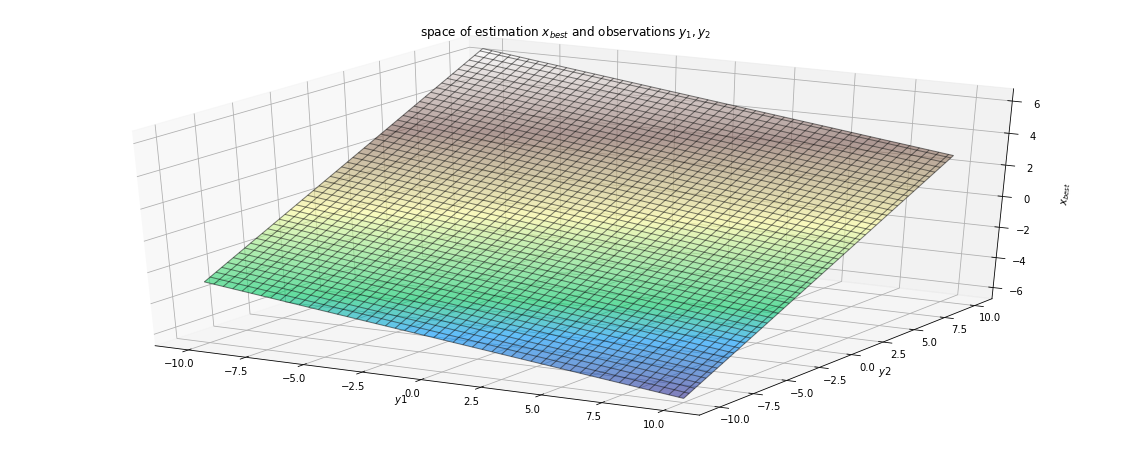

In [ ]:
illustrate()

## Important "exam-like" example

Let $X_1$ and $X_2$ be hidden variables with Covariance Matrix $V_X$ and Mean $\mathbb{E}[X_1], \mathbb{E}[X_2]$. We want to estimate $X_1$ and $X_2$ based on the observed value $Y = aX_1 + b X_2$ with known $a,b\in \mathbb{R}$. The task is to find out the linear coefficients $h = \begin{pmatrix} h_1 \\ h_2 \end{pmatrix}$ such that $\hat{X} = h^T Y$ optimally estimates $X$.

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
aG = 1
bG = 1

m_xG = [0,0]
var_xG = [[1,0], [0,1]]
corr_xG = [[1,0], [0,1]]

m_yyG = 0
m_xyG = [0,0]
hG = [0,0]

def update_parameters3(a, b, m_x_1, m_x_2, vx1, vx1_x2, vx2):
  global aG, bG, x1G, x1_x2G, x2G, m_xG, corr_xG, m_yyG, m_xyG, hG
  aG, bG, var_xG[0][0], var_xG[0][1], var_xG[1][0], var_xG[1][1], m_xG[0], m_xG[1] = a, b, vx1, vx1_x2, vx1_x2, vx2, m_x_1, m_x_2

  #important stuff
  ##############################################################################
  corr_xG[0][0] = var_xG[0][0] + m_xG[0]**2
  corr_xG[0][1] = corr_xG[1][0] = var_xG[0][1] + m_xG[0]*m_xG[1]
  corr_xG[1][1] = var_xG[1][1] + m_xG[1]**2

  print("Mean X")
  print("["+str(m_xG[0])+"]")
  print("["+str(m_xG[1])+"]")
  print("Variance X")
  print(var_xG[0])
  print(var_xG[1])
  print("Correlation X")
  print(corr_xG[0])
  print(corr_xG[1])

  m_yyG = [[aG**2 * corr_xG[0][0] + 2 * aG * bG * corr_xG[0][1] + bG**2 * corr_xG[1][1]]]
  m_xyG = [[aG * corr_xG[0][0] + bG * corr_xG[0][1]], [aG * corr_xG[1][0] + bG * corr_xG[1][1]]]

  hG = np.matmul(np.array(m_xyG), np.linalg.inv(np.array(m_yyG)))

widgets.interact(update_parameters3, a = widgets.FloatSlider(min=-10, max=10, value=1), b = widgets.FloatSlider(min=-10, max=10, value=1), m_x_1 = widgets.FloatSlider(min=-10, max=10, value=0, description='m(X_1)'), m_x_2 = widgets.FloatSlider(min=-10, max=10, value=0, description='m(X_2)'), vx1 = widgets.FloatSlider(min=0, max=10, value=1, description = 'Var(X_1)'), vx1_x2 = widgets.FloatSlider(min=-10, max=10, value=0, description='Cov(X_1, X_2)'), vx2 = widgets.FloatSlider(min=0, max=10, value=1, description='Var(X_2)'));

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

The orthogonality condition yields $h^T\ \mathbb{E}[YY^H] = \mathbb{E} [XY^H]$. We get for $\mathbb{E}[YY^H] = a^2 \mathbb{E}[X_1^2] + 2 a b \mathbb{E}[X_1 X_2] + b^2 \mathbb{E}[X_2^2]$

In [ ]:
print("E[YY^H]")
print(m_yyG)

E[YY^H]
[[2.0]]


Similarly we get for $\mathbb{E} [XY^H] = \mathbb{E} [\begin{pmatrix}a X_1^2 + b X_1 X_2\\ a X_1 X_2 + b X_2^2\end{pmatrix}]$

In [ ]:
print("E[XY^H]")
print(m_xyG[0])
print(m_xyG[1])

E[XY^H]
[1.0]
[1.0]


Now we can deduce the optimal coefficients $h$ from the orthogonality condition

In [ ]:
print("h")
print(hG[0])
print(hG[1])

h
[0.5]
[0.5]
